In [1]:
# importing the important libraries

import numpy as np
import pandas as pd
import re
import html
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

import nltk
from nltk.corpus import stopwords 
nltk.download('stopwords')
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.lancaster import LancasterStemmer


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/murtaza_vora/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
spark = SparkSession.builder.appName('Practise').getOrCreate()
import findspark
findspark.init()
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.1.1-bin-hadoop3.2"


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/06/24 20:10:50 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/06/24 20:10:52 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.


In [3]:
dataset = pd.read_csv("sentiment_analysis.csv") 

In [8]:
datasetspark = spark.read.csv('sentiment_analysis.csv', header = True, inferSchema = True)# reading the dataset

In [9]:
datasetspark.show()

+----------+--------------------+-----+
|        ID|                text|label|
+----------+--------------------+-----+
|7.68098E17|Josh Jenkins is l...|    1|
|7.68098E17|RT @MianUsmanJave...|    1|
|7.68098E17|RT @PEPalerts: Th...|    1|
|7.68098E17|RT @david_gaibis:...|    1|
|7.68098E17|RT @CedricFeschot...|    1|
|7.68098E17|RT @SH4WNSMILE: -...|    1|
|7.68098E17|RT @KendallHuntRP...|    1|
|7.68098E17|RT @BantySrkian: ...|    1|
|7.68098E17|RT @GayHopper_com...|    1|
|7.68098E17|RT @StarCinema: K...|    1|
|7.68098E17|We can have lots ...|    1|
|7.68098E17|Happy birthday to...|    1|
|7.68098E17|RT @SKDurrani_: @...|    1|
|7.68098E17|RT @ShaiLinne: Fe...|    1|
|7.68098E17|RT @ChelseaFC: It...|    1|
|7.68098E17|#Repost of @champ...|    1|
|7.68098E17|RT @giveasyoulive...|    1|
|7.68098E17|RT @derasachasaud...|    1|
|7.68098E17|Much love to my p...|    1|
|7.68098E17|hello everyone i'...|    1|
+----------+--------------------+-----+
only showing top 20 rows



In [17]:
datasetspark.describe().show()

+-------+--------------------+--------------------+--------------------+
|summary|                  ID|                text|               label|
+-------+--------------------+--------------------+--------------------+
|  count|              550391|              550391|              550383|
|   mean|7.886687488421921...|                null|  0.6755943116020319|
| stddev|1.343788213906732...|                null| 0.46935209564144986|
|    min|          7.68098E17|! 24 Brilliant Bu...|   Edgard #Pillet...|
|    max|          8.04619E17|🦃🍴😗👅 i couldn...|… https://t.co/UD...|
+-------+--------------------+--------------------+--------------------+



In [16]:
datasetspark.printSchema() # printing the data types of the dataframe

root
 |-- ID: double (nullable = true)
 |-- text: string (nullable = true)
 |-- label: string (nullable = true)



In [32]:
datasetspark.na.drop(how = 'all').count()

550391

In [30]:
datasetspark.filter(datasetspark.text.isNull() | datasetspark.label.isNull()).show()

+----------+--------------------+-----+
|        ID|                text|label|
+----------+--------------------+-----+
|7.83562E17|"@varshasinghmcx ...| null|
|7.96876E17|"The Live Action ...| null|
|7.98054E17|"#KatrinaKaif won...| null|
|7.98367E17|"she deadass put ...| null|
|7.98415E17|"Happy birthday @...| null|
|8.00823E17|"""if you let it ...| null|
|8.02631E17|"she threatened t...| null|
|8.03425E17|"Books Visit Audr...| null|
+----------+--------------------+-----+



In [34]:
# thus it is important to remove null values before and update the dataframe

datasetspark = datasetspark.na.drop(how = 'all')

In [36]:
import seaborn as sns

In [81]:
value_counts = dataset['label'].value_counts()
value_counts # getting count of 0/1 


1    371341
0    179050
Name: label, dtype: int64

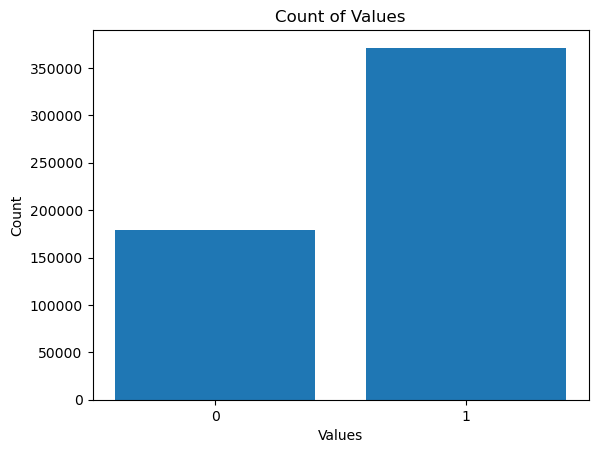

In [82]:
# Graphical representation of the above values
counts = [179050, 371341]
labels = ['0', '1']

plt.bar(labels, counts)
plt.xlabel('Values')
plt.ylabel('Count')
plt.title('Count of Values')

plt.show()

In [76]:
plt.show()

In [5]:
#Stop words removal
stp_words=stopwords.words('english')
def clean_review(review):
  cleanreview=" ".join(word for word in review.
                       split() if word not in stp_words)
  return cleanreview
 
dataset['text']=dataset['text'].apply(clean_review)

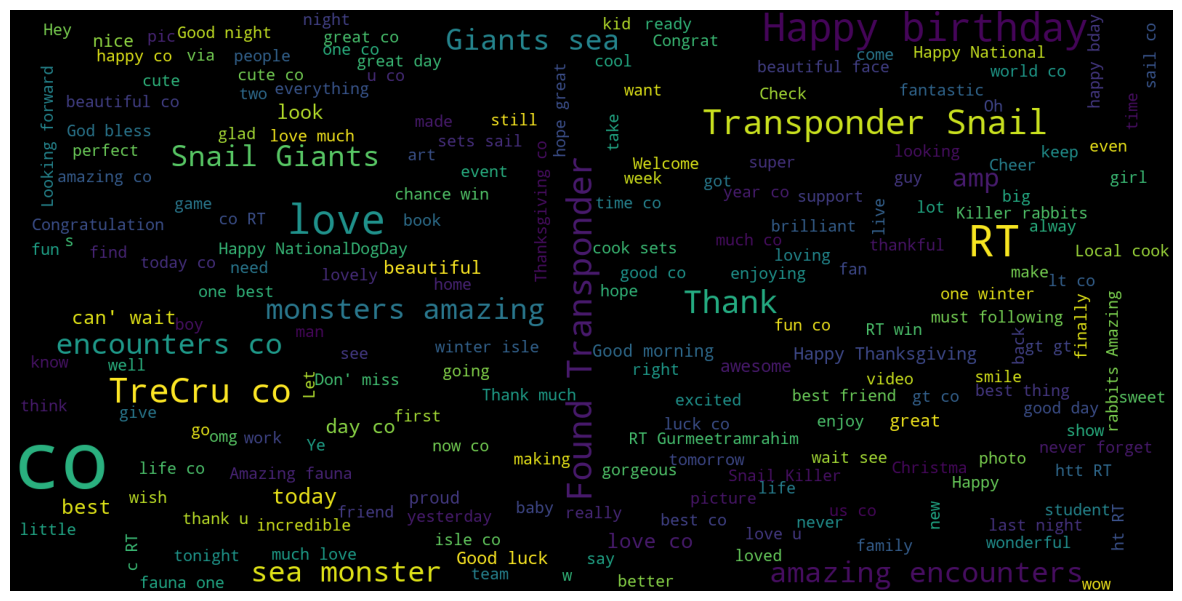

In [6]:
# wordcloud
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# removing words such as https and t as they does not have an actuall impact on our analysis
words_to_remove = ["https", "t"]

# Remove specified words from the text
def remove_words(text, words):
    for word in words:
        text = re.sub(r'\b' + re.escape(word) + r'\b', '', text)
    return text

# Remove specified words from the text
consolidated = ' '.join(remove_words(word, words_to_remove) for word in dataset['text'][dataset['label'] == 1].astype(str))

wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated))
plt.axis('off')
plt.show()


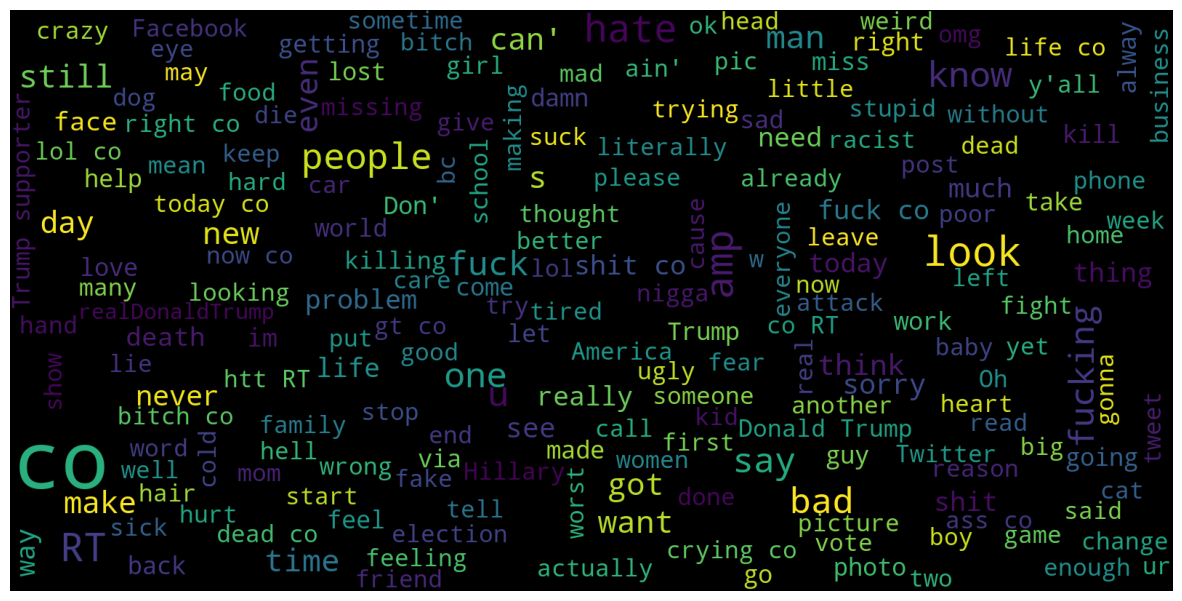

In [7]:
# word cloud for negative reviews !


import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Words to remove
words_to_remove = ["https", "t"]

# Remove specified words from the text
def remove_words(text, words):
    for word in words:
        text = re.sub(r'\b' + re.escape(word) + r'\b', '', text)
    return text

# Remove specified words from the text
consolidated2 = ' '.join(remove_words(word, words_to_remove) for word in dataset['text'][dataset['label'] == 0].astype(str))

wordCloud = WordCloud(width=1600, height=800, random_state=21, max_font_size=110)
plt.figure(figsize=(15, 10))
plt.imshow(wordCloud.generate(consolidated2))
plt.axis('off')
plt.show()

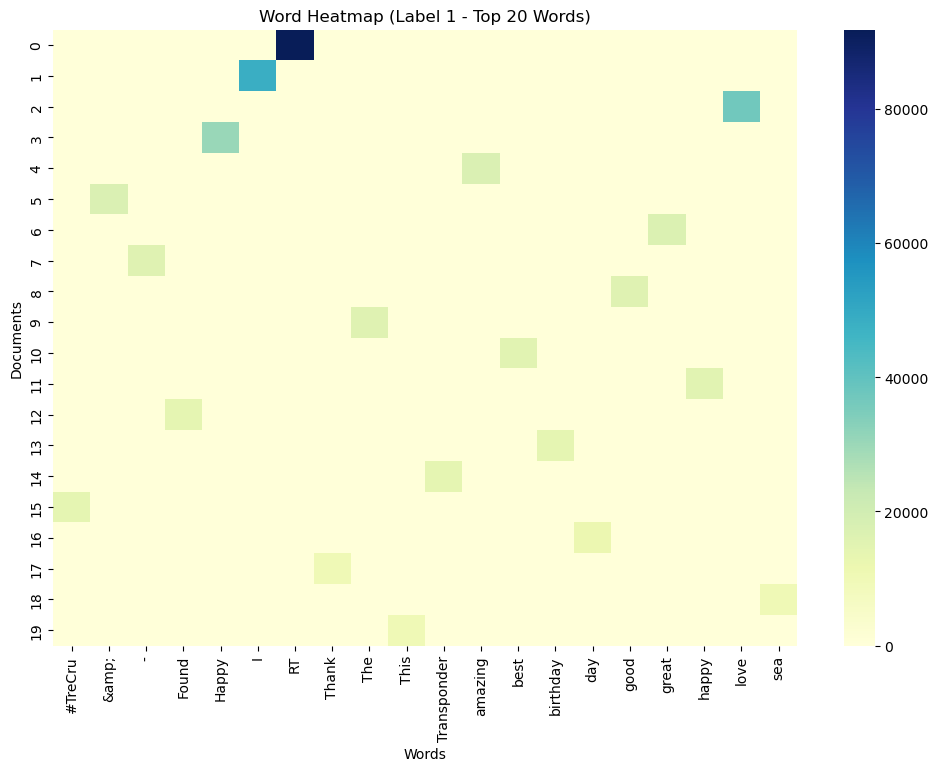

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'dataset' with a column named 'text'

# Filter the dataset based on the label condition
filtered_data = dataset[dataset['label'] == 1]

# Create a word frequency table
word_freq = filtered_data['text'].str.split(expand=True).stack().value_counts()

# Select the top 20 words
top_20_words = word_freq.head(20)

# Create a dataframe from the top 20 word frequency
df_word_freq = pd.DataFrame({'Word': top_20_words.index, 'Frequency': top_20_words.values})

# Pivot the dataframe to create a word-frequency matrix
word_matrix = df_word_freq.pivot(index=None, columns='Word', values='Frequency').fillna(0)

# Create the word heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(word_matrix, cmap='YlGnBu')
plt.title('Word Heatmap (Label 1 - Top 20 Words)')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()


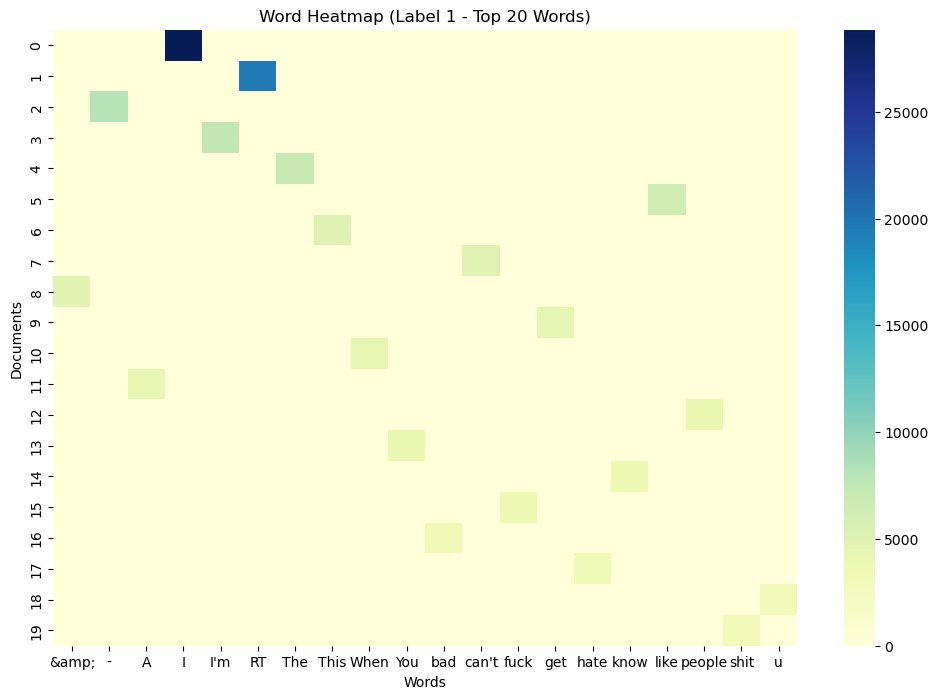

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a dataframe named 'dataset' with a column named 'text'

# Filter the dataset based on the label condition
filtered_data = dataset[dataset['label'] == 0]

# Create a word frequency table
word_freq = filtered_data['text'].str.split(expand=True).stack().value_counts()

# Select the top 20 words
top_20_words = word_freq.head(20)

# Create a dataframe from the top 20 word frequency
df_word_freq = pd.DataFrame({'Word': top_20_words.index, 'Frequency': top_20_words.values})

# Pivot the dataframe to create a word-frequency matrix
word_matrix = df_word_freq.pivot(index=None, columns='Word', values='Frequency').fillna(0)

# Create the word heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(word_matrix, cmap='YlGnBu')
plt.title('Word Heatmap (Label 1 - Top 20 Words)')
plt.xlabel('Words')
plt.ylabel('Documents')
plt.show()


### Abhi try the code below and let me know the output of the code



In [13]:
# pip install networkx
import networkx as nx
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter

# Preprocess your text data and create a list of words

words = word_tokenize(consolidated2)

# Calculate the frequency count of each word
word_counts = Counter(words)

# Get the top 20 most common words
top_words = [word for word, count in word_counts.most_common(5)] # change the number int round brackets to alter the number of words.

# Create a co-occurrence matrix
co_occurrence = {}

for i in range(len(words) - 1):
    for j in range(i + 1, len(words)):
        if words[i] in top_words and words[j] in top_words:
            pair = tuple(sorted([words[i], words[j]]))
            if pair in co_occurrence:
                co_occurrence[pair] += 1
            else:
                co_occurrence[pair] = 1

# Create an empty graph
G = nx.Graph()

# Add nodes and edges to the graph based on co-occurrence relationships
for pair, weight in co_occurrence.items():
    word1, word2 = pair
    G.add_edge(word1, word2, weight=weight)

# Set positions for the nodes using a spring layout algorithm
pos = nx.spring_layout(G)

# Set node colors based on their degree (number of connections)
node_colors = [G.degree(node) for node in G.nodes()]

# Set edge widths based on the weights
edge_widths = [data['weight'] for _, _, data in G.edges(data=True)]

# Draw the network graph
plt.figure(figsize=(12, 8))
nx.draw_networkx(G, pos, node_color=node_colors, node_size=300, edge_color=edge_widths, cmap='viridis', width=2)
plt.title('Network Graph of Top 5 Words')
plt.colorbar(label='Edge Weight')
plt.axis('off')
plt.show()
